<a href="https://colab.research.google.com/github/ayamkym/mashteckinc.github.io/blob/master/Datalit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing dependencies
from google.colab import files
# pandas for data preprocessing
!pip install pandas

# numpy for data manipulation
!pip install numpy

# matplotlib and seaborn for data visualization

!pip install matplotlib 
!pip install seaborn

**UPLOADING THE DATASET FOR  FLIGHT ANAYLISIS** 

In [2]:
uploaded = files.upload()

Saving formatted_flights.csv.txt to formatted_flights.csv.txt


In [3]:
# importing pandas as pd and Reading flight data into a dataframe
import pandas as pd
flight_data = pd.read_csv('formatted_flights.csv.txt')
# printing the first ten rows
flight_data.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [4]:
# A list airlines in operation in the dataframe
airlines = flight_data['name'].unique()

for airline in airlines:
  print(airline[:10])

United Air
American A
JetBlue Ai
Delta Air 
ExpressJet
Envoy Air
US Airways
Southwest 
Virgin Ame
AirTran Ai
Alaska Air
Endeavor A
Frontier A
Hawaiian A
Mesa Airli
SkyWest Ai


In [5]:
# shape of the dataframe
flight_data.shape

(317113, 3)

In [6]:
# some summary statistics
flight_data.describe()

,Unnamed: 0,arr_delay
count,317113.000000,317113.000000
mean,167477.171794,1.297143
std,97760.209641,29.064401
min,0.000000,-60.000000
25%,81769.000000,-17.000000
50%,166816.000000,-6.000000
75%,252451.000000,11.000000
max,336769.000000,120.000000


Text(0, 0.5, 'Flights')

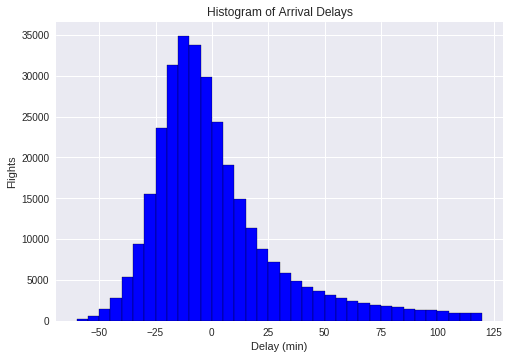

In [7]:
# Ploting a histogram to get a view of the distribution of flights delay
import matplotlib.pyplot as plt
import seaborn as sns

# A histogram with matplotplotlib
plt.hist(flight_data['arr_delay'], color = 'blue', edgecolor = 'black', bins = int(180/5))

#  labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

HISTOGRAMS ARE GOOD TO VISUALIZE A SINGLE VARIABLE

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Flights')

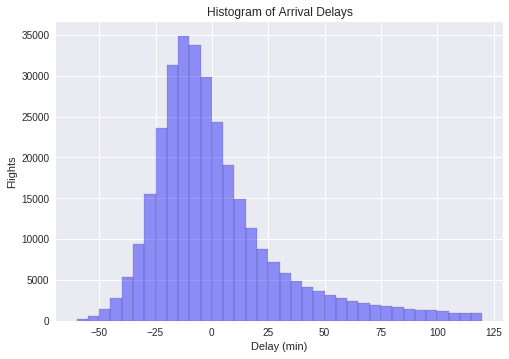

In [8]:
# A histgram with seaborn
sns.distplot(flight_data['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

VISUALIZING MORE FLIGHT DELAY ACROSS MANY CATEGORICAL VARIABLES.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Flights')

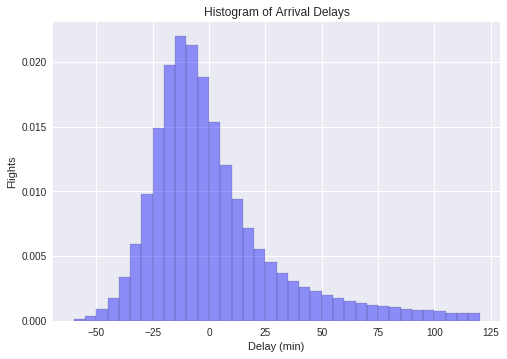

In [9]:
# A histgram with seaborn
sns.distplot(flight_data['arr_delay'], hist=True, kde=False, norm_hist= True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

*THE Y AXIS HAS BEEN NORMALIZED *
*IT IS ALSO DIFFICULT TO GET OF THE DISTRIBUTION OF ACROSS DIFFERENT AIRLINES*

**A VISUAL DISTRIBUTION  OF THE FLIGHT DELAY SINGLE VARIABLE  IN RELATION TO DIFFERENT AIRLINES**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


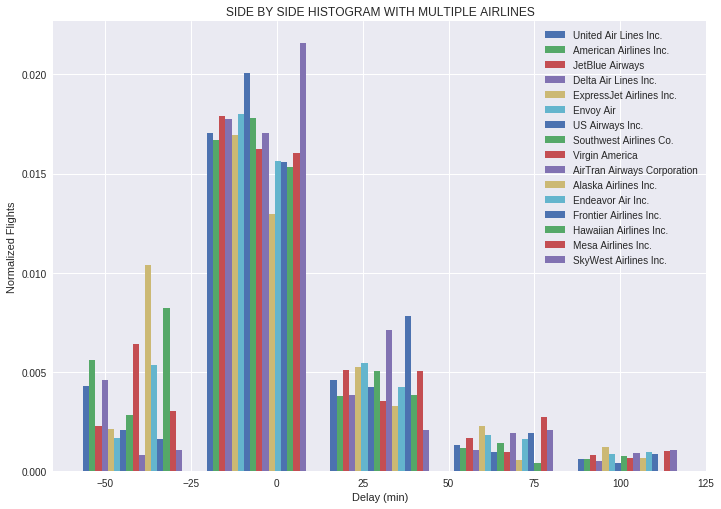

In [10]:
air_subset = []
for airline in airlines:

  subset = flight_data[flight_data['name'] == airline]['arr_delay']

  air_subset.append(subset)

  

  

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.hist(air_subset,  normed = True, bins =int(180/35), label = airlines)

 # labels

plt.legend()

plt.title('SIDE BY SIDE HISTOGRAM WITH MULTIPLE AIRLINES')

plt.xlabel('Delay (min)')

plt.ylabel('Normalized Flights')

plt.show()

HERE I HAVE CHANGED THE BINS TO 35 MINS TO AVOID CLUTTERING

*HISTOFRAMS ARE NOT IDEAL FOR VISUALIZING A SINGLE VARIABLE IN RELATION TO CATEGORICAL VARIABLES *
**A GOOD ALTERNATIVE WILL BE A DENSITY PLOT **

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


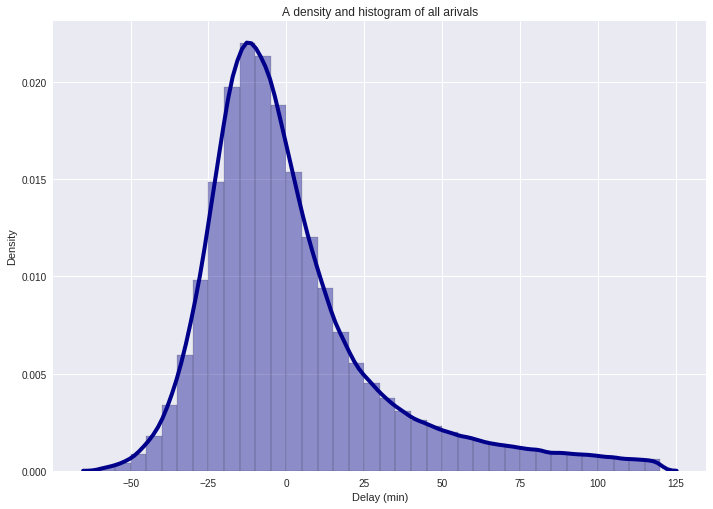

In [11]:
# A density plot plus histogram for all arrival delay

sns.distplot(flight_data['arr_delay'], hist = True, kde=True, bins= int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('A density and histogram of all arivals')
plt.xlabel('Delay (min)')
plt.ylabel('Density')
plt.show()

The curve shows the density plot which is a smooth version of the histogram
the y axix is normalized by default to show the same y scale as the density plot

**VISUALIZING ARRIVALS OF MULTIPLE AIRLINES WITH A DENSITY PLOT**








Text(0, 0.5, 'Density')

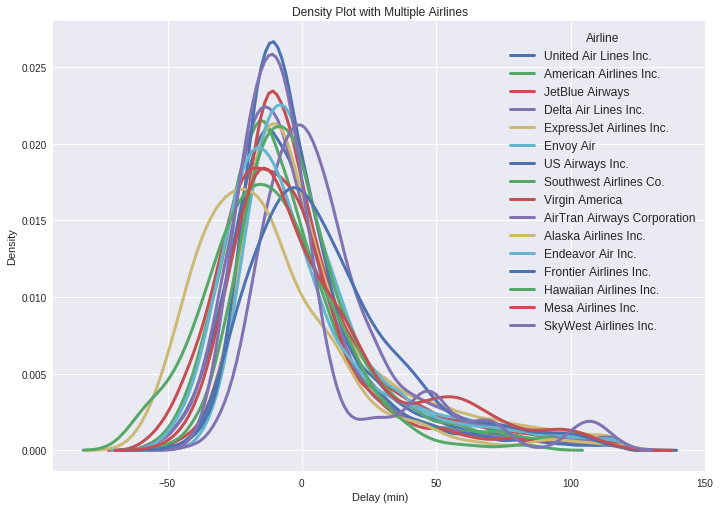

In [12]:
# is a visual plot of all airlines with seaborn

for airline in airlines:
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  subset = flight_data[flight_data['name'] == airline]
  sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

*from the plot above  a visual of all the airplanes is shown but it is a little bit clutted a good way to further make a good coparison is to choose the to four airlines that have a minimum delay*

Text(0, 0.5, 'Density')

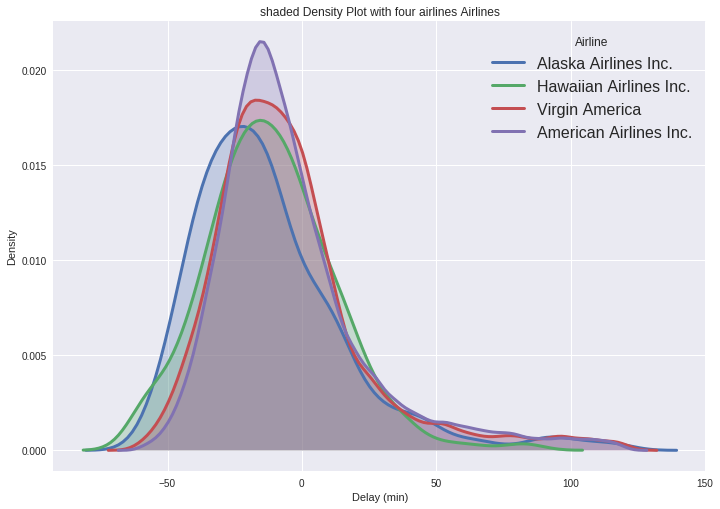

In [13]:
# subsetting four airline to visualize with a shaded density plot for easy comparison
#A list of airlines to plot
top_four = ['Alaska Airlines Inc.','Hawaiian Airlines Inc.','Virgin America','American Airlines Inc.']

# Iterate through the five airlines
for airline in top_four:
    # Subset to the airline
    subset = flight_data[flight_data['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('shaded Density Plot with four airlines Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

**in order to get a granular view and comparison of the airline choose the four that seem to have an early arrival and plot a shaded density plot**

I WOULD CHOOSE ALASKA CAUSE IT SEEMS TO ARRIVE EARLIER MORE OFTEN



**CENTRAL LIMIT THEOREM**

In [14]:
# import numpy as np
import numpy as np
# mean of the flight delay dataset
arr_delay_mean = np.mean(flight_data['arr_delay'])
print(arr_delay_mean)

# std of the flight delay dataset
std_delay = np.std(flight_data['arr_delay'])
print(std_delay)

1.2971432896160044
29.064355196654887


In [17]:
# population will be the length of the arr_delay 

population = len(flight_data['arr_delay'])
print(population)

317113


**if samples are drawn using the mean and std pf the flight_delay dataset using np.random.normal the mean and std of the samples will be equal to the flight arr_delay**

In [0]:
# drawing sample using np.random.normal
samples = np.random.normal(arr_delay_mean, std_delay, size = 1000000)

In [46]:
# finding the sample mean and starndar deviation which equal the true mean
sample_mean = np.mean(samples)
print(sample_mean)

sample_std = np.std(samples)
print(sample_std)

1.312235338865323
29.03549929188843


if the sample size is large enough the distribution will resembel a normal distribution that is a bell curve with approriate binwidth

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


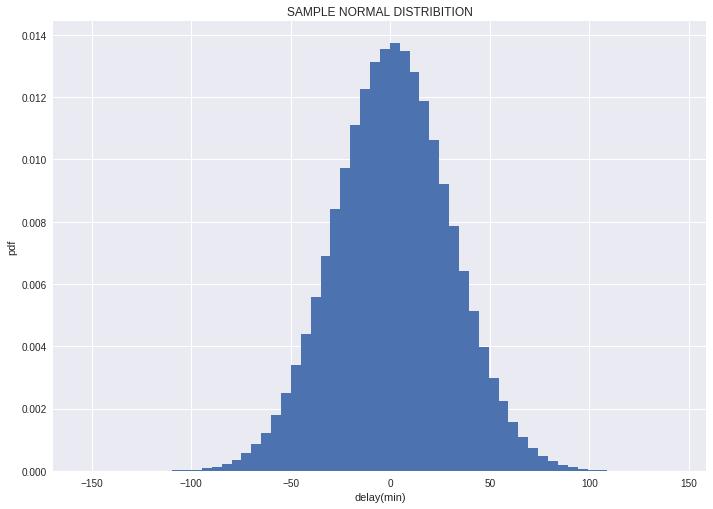

In [51]:
# ploting a histogram  of the sample drawn from the arr_delay population
_ = plt.hist(samples, bins = 60,  normed = True)

_ = plt.title('SAMPLE NORMAL DISTRIBITION')
_ = plt.xlabel('delay(min)')
_ = plt.ylabel('pdf')